# Early Stopping


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from srcs.modules.optimizer import SGD, Adam

from srcs.modules.functions import Softmax, np_log, numerical_gradient
from srcs.modules.activation import ReLU, Sigmoid
from srcs.modules.loss import CrossEntropyLoss
from srcs.modules.init import he_normal, xavier_normal, normal

from srcs.modules.layer import Dense
from srcs.modules.model import Sequential
from srcs.modules.plot import plot_multiple_models
from srcs.dataloader import get_wdbc
from srcs.train import train_model
from srcs import train

seed = 42

In [5]:
X_train, X_valid, t_train, t_valid = get_wdbc(csv_path="../data/data.csv", train_size=0.5)


training NoEarlyStopping...

Metrics: 
 Train [Accuracy:0.9930, Precision:1.0000, Recall:0.9811, F1:0.9905]
 Valid [Accuracy:0.9507, Precision:0.9259, Recall:0.9434, F1:0.9346]

training EarlyStopping_300...

Metrics: 
 Train [Accuracy:0.9719, Precision:0.9804, Recall:0.9434, F1:0.9615]
 Valid [Accuracy:0.9437, Precision:0.9592, Recall:0.8868, F1:0.9216]


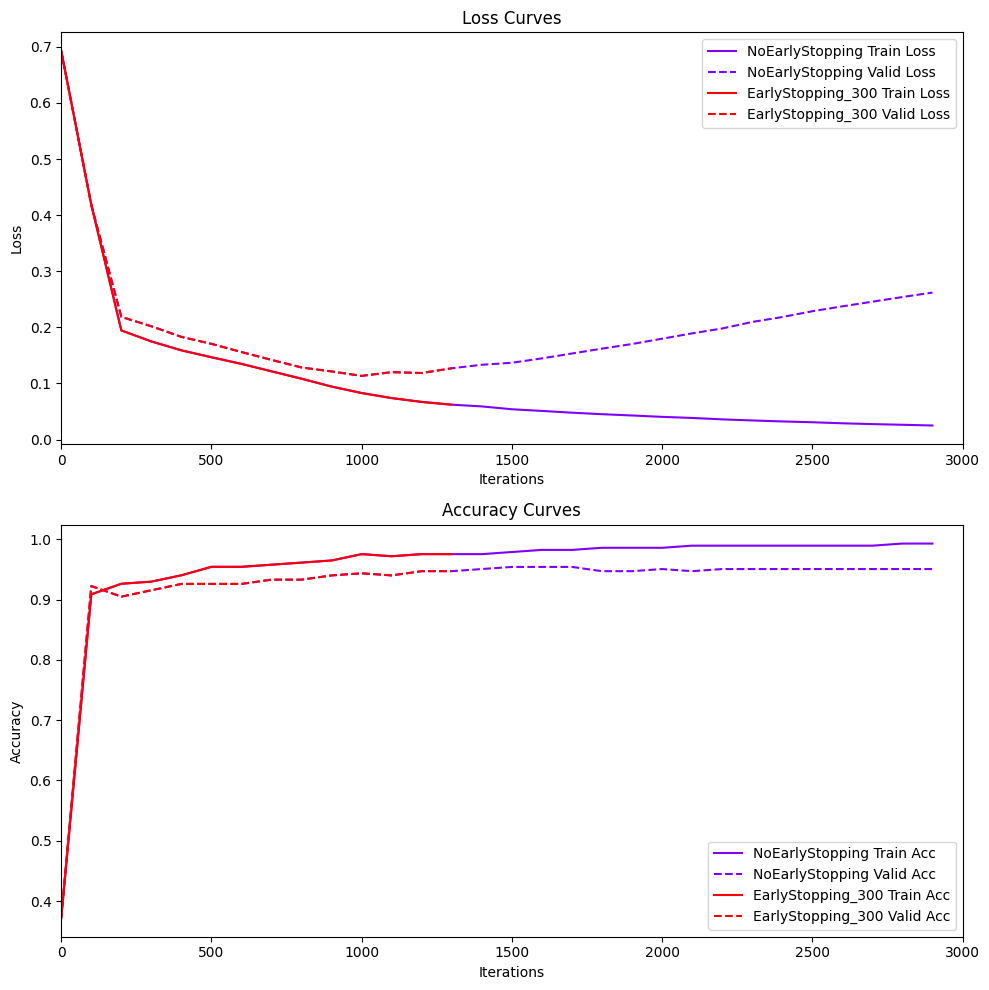

In [6]:
conditions = {
    "NoEarlyStopping"   : None,
    "EarlyStopping_300": 300,
}


models_results = []
max_itr = 3000
for name, patience in conditions.items():
    print(f"\ntraining {name}...")
    net = Sequential(
        layers=[
            Dense(in_features=30, out_features=200, activation=ReLU, init_method=normal, seed=seed),
            Dense(in_features=200, out_features=100, activation=ReLU, init_method=normal, seed=seed),
            Dense(in_features=100, out_features=50, activation=ReLU, init_method=normal, seed=seed),
            Dense(in_features=50, out_features=2, activation=Softmax, init_method=normal, seed=seed)
        ],
        criteria=CrossEntropyLoss,
        optimizer=Adam(lr=0.0001),
        weight_decay=0,
    )

    iterations, train_losses, train_accs, valid_losses, valid_accs = train_model(
        model=net,
        X_train=X_train,
        t_train=t_train,
        X_valid=X_valid,
        t_valid=t_valid,
        iters_num=max_itr,
        verbose=False,
        plot=False,
        metrics_interval=100,
        patience=patience,
        name="WDBC"
    )

    models_results.append({
        'name'          : name,
        'iterations'    : iterations,
        'train_losses'  : train_losses,
        'train_accs'    : train_accs,
        'valid_losses'  : valid_losses,
        'valid_accs'    : valid_accs
    })


plot_multiple_models(max_itr, models_results)
